# 1. IMPORTATION

In [565]:
import numpy as np
import pandas as pd

# 2. changement de données

In [566]:
data = pd.read_csv('Data/USA_Housing.csv')

In [567]:
# selection de colonne
data = data[["Avg. Area Income","Price"]]

In [568]:
data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [569]:
data.isnull()

,Avg. Area Income,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4995,False,False
4996,False,False
4997,False,False
4998,False,False


In [570]:
data.isnull().sum()

Avg. Area Income    0
Price               0
dtype: int64

In [571]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.3 KB


In [572]:
data['Avg. Area Income'].max()

107701.74837763936

In [573]:
data['Avg. Area Income'].min()

17796.631189543397

In [574]:
print(data['Avg. Area Income'].max())

107701.74837763936


In [575]:
print("Max Price: ", data['Price'].max())

Max Price:  2469065.5941747027


In [576]:
print("Min Price: ", data['Price'].min())

Min Price:  15938.657923287848


# 4.Division des données

# variables indep et variables dep

In [577]:
x = data.iloc[ :, :-1].values
y = data.iloc[ :, -1].values

In [578]:
x

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [579]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

# 4.1. separation de données:Train et Test

In [580]:
# x_train, x_test, y_train,y_test
from sklearn.model_selection import train_test_split

In [581]:
train_test_split(x, y, test_size=0.25, random_state=40)

[array([[61436.91890629],
        [70950.42998672],
        [76388.55195821],
        ...,
        [80807.73283844],
        [94241.82332287],
        [51796.13357753]]),
 array([[75391.68175788],
        [85852.14918103],
        [75537.79451   ],
        ...,
        [61875.0759734 ],
        [78318.81449084],
        [75908.67049714]]),
 array([ 868713.43669433, 1538039.5989439 , 1114729.72452353, ...,
        1304284.2260061 , 2180065.59773864,  891468.21327911]),
 array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
         975005.77366035, 1393995.96182827, 1036277.0624633 ])]

In [582]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [583]:
print("x_train_Shape:", x_train.shape)

x_train_Shape: (3750, 1)


In [584]:
print("x_test_Shape", x_test.shape)

x_test_Shape (1250, 1)


In [585]:
print("y_train_Shape:", y_train.shape)

y_train_Shape: (3750,)


In [586]:
print("y_test_Shape:", y_test.shape)

y_test_Shape: (1250,)


# 5. construction du modele

In [587]:
# importer l'ogarithme de la regression linear
from sklearn.linear_model import LinearRegression

In [588]:
modele_lineaire = LinearRegression()

In [589]:
# entrainement du modele 
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [590]:
# faire de prediction 
y_prices_predits = modele_lineaire.predict(x_test)

In [591]:
y_prices_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991])

In [592]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ])

In [593]:
# evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [594]:
print("MSE de la Regression Lineaire:", mean_squared_error(y_test, y_prices_predits))

MSE de la Regression Lineaire: 70345556190.3212


In [595]:
print("R2 Price de la Regression Lineaire:", r2_score( y_test, y_prices_predits))

R2 Price de la Regression Lineaire: 0.43322233931263276


# 6. Visualisation de resultats

In [596]:
import matplotlib.pyplot as plt

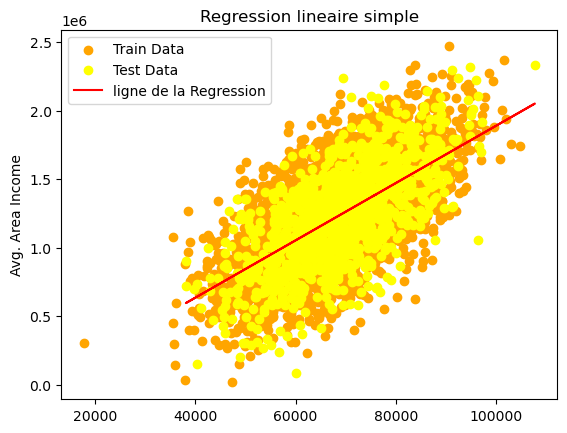

In [597]:
plt.scatter(x_train, y_train, color='orange', label='Train Data')
plt.scatter(x_test, y_test, color='yellow', label='Test Data')
plt.plot(x_test, y_prices_predits, color='red', label='ligne de la Regression')
# ou encore plt.plot(x_train, modele_lineaire.predict(x_train), color='red', label='ligne de la Regression')
plt.ylabel('Avg. Area Income')
plt.title('Regression lineaire simple')
plt.legend()
plt.show()

In [598]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


# 7.prediction simple

In [600]:
resultats = pd.DataFrame({'y-prices-reel' : y_test, 'y_prices_predits': y_prices_predits})
resultats

,y-prices-reel,y_prices_predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06
